In [1]:
import torch
torch.manual_seed(123)

In [2]:
# Fastai is required by eb_ml_battery_lib
!pip install fastai==2.5.3 -q
# import
import pandas as pd
import numpy as np
import sys
from fastai.tabular import *
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
external_python_file_path='../src'
sys.path.append(external_python_file_path)


from eb_ml_colab_utils import get_root_path,copy_model_to_google_drive
from eb_ml_battery_lib import load_soc_dataset
from eb_ml_utils import show_pair_plot,show_coorelation_plot

You should consider upgrading via the '/Users/emanuelebuchicchio/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
#configuration dictionary
config ={}

# Root working folder (local or Google Drive)
# config['ROOT_DIR'] = get_root_path("batterie")
config['ROOT_DIR'] = get_root_path("..")  

# Folder with dataset in CSV format
#config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets"
config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets/EIS-vs-SOC-May2022"

# List of SoC level into dataset
#config['soc_list']=['100','090','080','070','060','050','040','030','020','010']
config['soc_list']=['100','090','080','070','060','050','040','030','020','010']

# Data acquition file to load from dateset folder
battery_list=["03_1","03_2","03_3","03_4","03_5","03_6","03_7","03_8","03_9"]
dataset,feature_col_names=load_soc_dataset(battery_list,config["soc_list"],config['DATASETS_DIR'])

NOT running on COLAB


/Users/emanuelebuchicchio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(


In [4]:
dataset

,BATTERY_ID,EIS_ID,SOC,Z_f0,Z_f1,Z_f10,Z_f11,Z_f12,Z_f13,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9
100,03,03_1,100,0.076569-0.004547j,0.075579-0.003016j,0.058207-0.006957j,0.055055-0.006083j,0.052511-0.004948j,0.050122-0.003366j,0.074930-0.002362j,0.074386-0.001810j,0.073517-0.001898j,0.073016-0.002361j,0.072143-0.003337j,0.069853-0.005223j,0.066702-0.006825j,0.062942-0.007240j
090,03,03_1,090,0.074560-0.005103j,0.072910-0.003908j,0.057430-0.006459j,0.054409-0.005560j,0.052058-0.004721j,0.049707-0.003247j,0.071837-0.002692j,0.071387-0.002087j,0.070374-0.001845j,0.069751-0.002105j,0.069115-0.002792j,0.067244-0.004290j,0.064886-0.005643j,0.061813-0.006449j
080,03,03_1,080,0.072229-0.005322j,0.070622-0.004005j,0.056638-0.005795j,0.053834-0.005172j,0.051565-0.004330j,0.049230-0.003058j,0.069447-0.002742j,0.068973-0.002055j,0.068039-0.001784j,0.067393-0.002012j,0.066942-0.002481j,0.065466-0.003866j,0.063236-0.004944j,0.060332-0.005948j
070,03,03_1,070,0.071432-0.005437j,0.069737-0.004372j,0.056161-0.005563j,0.053587-0.005117j,0.051301-0.004305j,0.049184-0.003026j,0.068468-0.002889j,0.068113-0.002005j,0.067053-0.001765j,0.066550-0.001988j,0.065998-0.002408j,0.064399-0.003510j,0.062462-0.004631j,0.059982-0.005417j
060,03,03_1,060,0.072060-0.004399j,0.070062-0.004205j,0.056253-0.005545j,0.053652-0.005056j,0.051468-0.004223j,0.049392-0.002916j,0.068534-0.002555j,0.068189-0.001881j,0.067142-0.001674j,0.066788-0.001932j,0.066186-0.002409j,0.064686-0.003625j,0.062710-0.004770j,0.060049-0.005462j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
050,03,03_9,050,0.100378-0.003954j,0.099021-0.003182j,0.087333-0.004933j,0.084976-0.004697j,0.082808-0.004167j,0.080431-0.003289j,0.098186-0.002078j,0.097668-0.001559j,0.097199-0.001414j,0.096668-0.001848j,0.096151-0.002361j,0.094496-0.003228j,0.092833-0.004192j,0.090479-0.004754j
040,03,03_9,040,0.102126-0.003636j,0.101105-0.002820j,0.088346-0.005276j,0.085793-0.005010j,0.083597-0.004347j,0.081079-0.003340j,0.100182-0.001933j,0.100085-0.001351j,0.099444-0.001445j,0.098894-0.001908j,0.098273-0.002514j,0.096448-0.003688j,0.094215-0.004897j,0.091622-0.005292j
030,03,03_9,030,0.103930-0.003756j,0.102584-0.003085j,0.088774-0.005400j,0.086189-0.005090j,0.083947-0.004517j,0.081348-0.003415j,0.101950-0.001893j,0.101735-0.001558j,0.100730-0.001733j,0.100167-0.002268j,0.099325-0.002927j,0.097076-0.004344j,0.094689-0.005083j,0.092176-0.005422j
020,03,03_9,020,0.107854-0.004239j,0.106414-0.003588j,0.089283-0.005459j,0.086762-0.005106j,0.084559-0.004526j,0.081891-0.003456j,0.105235-0.002492j,0.104801-0.002103j,0.103873-0.002582j,0.102685-0.003362j,0.101201-0.004314j,0.097943-0.005289j,0.095427-0.005603j,0.092648-0.005597j


In [5]:
dataset.reset_index(drop=True,inplace=True)
dataset['SOC_float'] = dataset.SOC.astype('float')
dataset['SOC_category'] = dataset.SOC.astype('category')

In [6]:
from cmath import phase, polar, rect
df=dataset[feature_col_names]
df_phi= df.apply(lambda col: col.apply(lambda val: phase(val)))
df_abs= df.apply(lambda col: col.apply(lambda val: abs(val)))

In [7]:
df_commn=dataset[['SOC_float','BATTERY_ID','EIS_ID']]
dataset_polar= df_phi.join(df_abs,lsuffix='_abs' , rsuffix="_phi")
dataset_polar= df_commn.join(dataset_polar)
print(dataset_polar)

    SOC_float BATTERY_ID EIS_ID  Z_f0_abs  Z_f1_abs  Z_f2_abs  Z_f3_abs  \
0       100.0         03   03_1 -0.059308 -0.039878 -0.031516 -0.024327   
1        90.0         03   03_1 -0.068332 -0.053545 -0.037459 -0.029226   
2        80.0         03   03_1 -0.073549 -0.056644 -0.039456 -0.029790   
3        70.0         03   03_1 -0.075971 -0.062613 -0.042172 -0.029422   
4        60.0         03   03_1 -0.060966 -0.059942 -0.037260 -0.027579   
..        ...        ...    ...       ...       ...       ...       ...   
85       50.0         03   03_9 -0.039371 -0.032124 -0.021158 -0.015956   
86       40.0         03   03_9 -0.035587 -0.027883 -0.019294 -0.013497   
87       30.0         03   03_9 -0.036119 -0.030065 -0.018566 -0.015315   
88       20.0         03   03_9 -0.039279 -0.033708 -0.023674 -0.020061   
89       10.0         03   03_9 -0.052939 -0.045714 -0.039300 -0.038586   

    Z_f4_abs  Z_f5_abs  Z_f6_abs  ...  Z_f4_phi  Z_f5_phi  Z_f6_phi  Z_f7_phi  \
0  -0.025815 -0.03

## Regression

In [8]:
from fastai.tabular.all import *

In [9]:
polar_feature_names= list()
for feat_name in feature_col_names:
    polar_feature_names.append(feat_name+"_phi")
    polar_feature_names.append(feat_name+"_abs")

In [10]:
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_polar))

In [11]:
#Path / default location for saving/loading models
path = '../models'

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset
cat_names = ['BATTERY_ID', 'EIS_ID'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =polar_feature_names

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]


In [12]:
dataset_polar['SOC_float']

0     100.0
1      90.0
2      80.0
3      70.0
4      60.0
      ...  
85     50.0
86     40.0
87     30.0
88     20.0
89     10.0
Name: SOC_float, Length: 90, dtype: float64

# Regression with Tabular Learner - Polar 

In [13]:
to = TabularPandas(dataset_polar, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = polar_feature_names,
                   y_names='SOC_float',
                   splits=splits)

In [14]:
dls = to.dataloaders(bs=64)
dls.show_batch()

,BATTERY_ID,EIS_ID,Z_f0_phi,Z_f0_abs,Z_f1_phi,Z_f1_abs,Z_f2_phi,Z_f2_abs,Z_f3_phi,Z_f3_abs,Z_f4_phi,Z_f4_abs,Z_f5_phi,Z_f5_abs,Z_f6_phi,Z_f6_abs,Z_f7_phi,Z_f7_abs,Z_f8_phi,Z_f8_abs,Z_f9_phi,Z_f9_abs,Z_f10_phi,Z_f10_abs,Z_f11_phi,Z_f11_abs,Z_f12_phi,Z_f12_abs,Z_f13_phi,Z_f13_abs,SOC_float
0,03,03_8,0.104242,-0.035450,0.102877,-0.028106,0.101937,-0.019214,0.101768,-0.014888,0.101152,-0.015327,0.100663,-0.020325,0.099661,-0.026557,0.097822,-0.041884,0.095788,-0.050864,0.093262,-0.056122,0.089903,-0.058760,0.087356,-0.056598,0.085155,-0.051639,0.082640,-0.040673,30.0
1,03,03_1,0.076704,-0.059308,0.075639,-0.039878,0.074967,-0.031516,0.074408,-0.024327,0.073542,-0.025815,0.073054,-0.032319,0.072221,-0.046222,0.070048,-0.074635,0.067050,-0.101973,0.063357,-0.114520,0.058621,-0.118964,0.055390,-0.110036,0.052744,-0.093957,0.050235,-0.067055,100.0
2,03,03_3,0.117644,-0.049379,0.116592,-0.034984,0.115572,-0.027888,0.114593,-0.024049,0.113593,-0.026803,0.112440,-0.036802,0.110595,-0.051594,0.106621,-0.081030,0.102425,-0.096564,0.096824,-0.099636,0.090750,-0.096133,0.087122,-0.084895,0.084057,-0.072013,0.080801,-0.053862,100.0
3,03,03_2,0.070809,-0.044373,0.069845,-0.035835,0.069100,-0.023432,0.068929,-0.016661,0.068376,-0.017359,0.068121,-0.022475,0.067696,-0.028760,0.066335,-0.049846,0.064527,-0.067199,0.062258,-0.080632,0.058822,-0.087643,0.056294,-0.084898,0.054178,-0.074938,0.052002,-0.055819,40.0
4,03,03_9,0.102639,-0.053756,0.100412,-0.050249,0.098640,-0.032998,0.098047,-0.022959,0.097067,-0.020528,0.096303,-0.023347,0.095555,-0.025064,0.093997,-0.035194,0.092329,-0.045830,0.090094,-0.052024,0.087088,-0.055432,0.084632,-0.054137,0.082625,-0.049524,0.080306,-0.040132,60.0
5,03,03_6,0.103321,-0.059747,0.101433,-0.045962,0.100010,-0.030753,0.099322,-0.024998,0.097968,-0.022587,0.097502,-0.023405,0.096457,-0.028315,0.095020,-0.036104,0.093133,-0.049012,0.090703,-0.056226,0.087419,-0.061961,0.084856,-0.058920,0.082373,-0.054066,0.079988,-0.041068,70.0
6,03,03_5,0.103396,-0.052553,0.100949,-0.050602,0.099129,-0.032999,0.098790,-0.023187,0.097457,-0.021281,0.096829,-0.021970,0.096242,-0.026450,0.094514,-0.039504,0.092681,-0.050929,0.090053,-0.060743,0.086500,-0.063684,0.083873,-0.062550,0.081565,-0.053513,0.078993,-0.043381,60.0
7,03,03_8,0.104231,-0.056989,0.102316,-0.048168,0.100716,-0.032694,0.100079,-0.024634,0.098961,-0.022237,0.098148,-0.024600,0.097313,-0.027092,0.095713,-0.038159,0.093761,-0.048026,0.091647,-0.054222,0.088139,-0.057765,0.085767,-0.056294,0.083486,-0.052225,0.081157,-0.039840,70.0
8,03,03_9,0.117821,-0.052939,0.115816,-0.045714,0.114005,-0.039300,0.112953,-0.038586,0.110113,-0.051520,0.107457,-0.064658,0.104057,-0.070668,0.099327,-0.067363,0.096326,-0.065841,0.093803,-0.064957,0.090439,-0.062525,0.087751,-0.060234,0.085401,-0.054308,0.082766,-0.042954,10.0
9,03,03_2,0.070647,-0.047299,0.069479,-0.040050,0.068620,-0.024403,0.068455,-0.018780,0.067919,-0.017386,0.067472,-0.022542,0.066952,-0.029901,0.065785,-0.048653,0.064140,-0.064015,0.061884,-0.079729,0.058444,-0.087927,0.055926,-0.084237,0.053927,-0.074926,0.051665,-0.058257,50.0


In [15]:
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse,path=path)

SuggestedLRs(valley=0.010964781977236271)

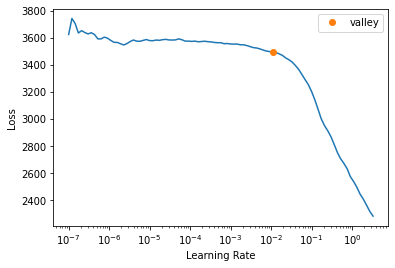

In [16]:
lr_value=learn.lr_find()
lr_value

In [17]:
learn.fit_one_cycle(250,lr_value)

epoch,train_loss,valid_loss,_rmse,time
0,3476.244385,5106.007812,71.456337,00:00
1,3601.568115,5104.899902,71.448586,00:00
2,3558.300537,5103.374512,71.437904,00:00
3,3537.908691,5101.919922,71.427727,00:00
4,3555.504883,5099.965820,71.414047,00:00
5,3545.310791,5097.731934,71.398399,00:00
6,3538.203369,5094.852051,71.378235,00:00
7,3534.896729,5090.928711,71.350746,00:00
8,3509.833252,5085.904785,71.315529,00:00
9,3517.837402,5079.861328,71.273148,00:00


In [18]:
learn.show_results()

,BATTERY_ID,EIS_ID,Z_f0_phi,Z_f0_abs,Z_f1_phi,Z_f1_abs,Z_f2_phi,Z_f2_abs,Z_f3_phi,Z_f3_abs,Z_f4_phi,Z_f4_abs,Z_f5_phi,Z_f5_abs,Z_f6_phi,Z_f6_abs,Z_f7_phi,Z_f7_abs,Z_f8_phi,Z_f8_abs,Z_f9_phi,Z_f9_abs,Z_f10_phi,Z_f10_abs,Z_f11_phi,Z_f11_abs,Z_f12_phi,Z_f12_abs,Z_f13_phi,Z_f13_abs,SOC_float,SOC_float_pred
0,1.0,1.0,-2.060577,0.180848,-2.036969,0.532465,-2.015321,0.614199,-2.004318,0.531097,-1.997570,0.576292,-2.007805,0.039923,-1.998352,-0.278376,-2.004381,-0.828458,-2.012829,-1.437187,-2.025791,-1.749581,-2.051866,-1.862907,-2.029486,-1.917518,-2.040378,-1.918948,-2.031673,-1.737230,30.0,28.049316
1,1.0,7.0,1.249705,-0.269828,1.245119,-0.373764,1.214013,-1.195578,1.180645,-1.797747,1.105556,-2.541706,1.015259,-2.594529,0.898200,-2.336529,0.738892,-1.157240,0.688766,-0.067926,0.719233,0.462398,0.752798,0.712722,0.750165,0.662608,0.753958,0.673770,0.764922,0.586131,10.0,12.173677
2,1.0,5.0,0.232196,1.153410,0.263636,1.118889,0.299608,1.291288,0.314470,1.081767,0.342878,0.879816,0.366893,0.656502,0.400030,0.528011,0.441443,0.558206,0.432032,0.429188,0.434992,0.486076,0.440933,0.484743,0.442500,0.513162,0.447456,0.503148,0.440512,0.290870,30.0,29.745573
3,1.0,6.0,0.355065,-0.757641,0.337608,-0.517078,0.312406,-0.547065,0.304965,-0.383572,0.303791,0.053221,0.315136,0.319475,0.322769,0.401364,0.368090,0.633835,0.401305,0.653615,0.422714,0.559250,0.428720,0.522102,0.435551,0.456339,0.442336,0.493360,0.449480,0.461057,80.0,77.988724
4,1.0,4.0,0.244415,1.174363,0.284851,1.392129,0.311805,1.397496,0.332290,1.181966,0.367720,0.911367,0.387638,0.806642,0.424915,0.694680,0.478154,0.684716,0.484998,0.477069,0.492768,0.276818,0.473423,0.306039,0.466517,0.242651,0.450616,0.355016,0.454016,0.222287,40.0,41.754501
5,1.0,9.0,0.383658,-0.355620,0.380954,-0.115565,0.366589,-0.304119,0.362760,-0.128791,0.356563,0.077507,0.369411,0.285057,0.385544,0.362772,0.406939,0.495505,0.423328,0.576310,0.428724,0.617114,0.454210,0.606968,0.458445,0.607264,0.464352,0.619205,0.465711,0.352287,90.0,89.938789
6,1.0,3.0,0.774576,-0.995682,0.739471,-0.775319,0.715570,-0.729107,0.709525,-0.728083,0.699568,-0.296450,0.699859,-0.096036,0.725092,-0.159112,0.727751,-0.393131,0.665889,-0.604669,0.597728,-0.624762,0.518287,-0.587036,0.467318,-0.367643,0.433998,-0.204195,0.408811,-0.156733,80.0,76.376625
7,1.0,8.0,0.431698,0.050264,0.471263,0.771496,0.498788,0.470590,0.493762,0.396983,0.517930,0.271379,0.533056,0.272990,0.549268,0.112418,0.544412,-0.057783,0.521874,0.012349,0.503402,0.183269,0.495724,0.277729,0.489697,0.157677,0.477336,0.213579,0.459953,0.145963,100.0,97.734879
8,1.0,3.0,0.940742,-0.653894,0.921953,-0.377607,0.893464,-0.516637,0.889464,-0.380258,0.879516,-0.296989,0.897786,-0.333238,0.909769,-0.137159,0.878921,-0.801425,0.802297,-0.985830,0.712775,-1.062289,0.591796,-0.837858,0.529255,-0.597402,0.485857,-0.593754,0.450770,-0.439763,90.0,81.605972


In [19]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)


4.3961496

In [20]:
learn.save('EIS_tabular_regression')

Path('../models/models/EIS_tabular_regression.pth')

# Tabular Learner Regression - Rectangular

In [21]:
from cmath import phase, polar, rect
df=dataset[feature_col_names]
df_real= df.apply(lambda col: col.apply(lambda val: np.real(val)))
df_imag= df.apply(lambda col: col.apply(lambda val: np.imag(val)))

In [22]:
rect_feature_names= list()
for feat_name in feature_col_names:
    rect_feature_names.append(feat_name+"_real")
    rect_feature_names.append(feat_name+"_imag")

In [23]:
df_commn=dataset[['SOC_float','BATTERY_ID','EIS_ID']]
dataset_rect= df_real.join(df_imag,lsuffix='_real' , rsuffix="_imag")
dataset_rect= df_commn.join(dataset_rect)
print(dataset_rect)

    SOC_float BATTERY_ID EIS_ID  Z_f0_real  Z_f1_real  Z_f2_real  Z_f3_real  \
0       100.0         03   03_1   0.076569   0.075579   0.074930   0.074386   
1        90.0         03   03_1   0.074560   0.072910   0.071837   0.071387   
2        80.0         03   03_1   0.072229   0.070622   0.069447   0.068973   
3        70.0         03   03_1   0.071432   0.069737   0.068468   0.068113   
4        60.0         03   03_1   0.072060   0.070062   0.068534   0.068189   
..        ...        ...    ...        ...        ...        ...        ...   
85       50.0         03   03_9   0.100378   0.099021   0.098186   0.097668   
86       40.0         03   03_9   0.102126   0.101105   0.100182   0.100085   
87       30.0         03   03_9   0.103930   0.102584   0.101950   0.101735   
88       20.0         03   03_9   0.107854   0.106414   0.105235   0.104801   
89       10.0         03   03_9   0.117656   0.115695   0.113917   0.112869   

    Z_f4_real  Z_f5_real  Z_f6_real  ...  Z_f4_imag

In [24]:
# Regression with Tabular Learner - Polar 
to = TabularPandas(dataset_rect, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = rect_feature_names,
                   y_names='SOC_float',
                   splits=splits)
dls = to.dataloaders(bs=64)
dls.show_batch()
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse)



,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float
0,03,03_4,0.106988,-0.005680,0.104979,-0.004476,0.103673,-0.003104,0.103124,-0.002425,0.102046,-0.002259,0.101203,-0.002583,0.100306,-0.003460,0.098198,-0.004834,0.095436,-0.006145,0.092336,-0.006603,0.087881,-0.006612,0.084926,-0.005938,0.082332,-0.005103,0.079676,-0.003831,90.0
1,03,03_6,0.105595,-0.005202,0.104546,-0.003422,0.103787,-0.002494,0.103271,-0.001926,0.102475,-0.002036,0.101759,-0.002493,0.100942,-0.003006,0.098506,-0.004813,0.095905,-0.005917,0.092838,-0.006218,0.088706,-0.006272,0.085711,-0.005892,0.083163,-0.005077,0.080516,-0.003842,100.0
2,03,03_8,0.104416,-0.005928,0.102415,-0.004648,0.101054,-0.003228,0.100439,-0.002509,0.099252,-0.002237,0.098470,-0.002468,0.097735,-0.002741,0.095940,-0.003939,0.093914,-0.004823,0.091400,-0.005192,0.087955,-0.005301,0.085350,-0.005046,0.083119,-0.004432,0.080732,-0.003353,80.0
3,03,03_5,0.100814,-0.004075,0.099371,-0.003207,0.098613,-0.002108,0.098250,-0.001507,0.097491,-0.001483,0.096974,-0.001855,0.096502,-0.002413,0.094991,-0.003607,0.092867,-0.004687,0.090221,-0.005393,0.086680,-0.005426,0.083998,-0.005222,0.081729,-0.004517,0.079273,-0.003383,50.0
4,03,03_8,0.104179,-0.005474,0.101813,-0.004984,0.100139,-0.003198,0.099633,-0.002223,0.098487,-0.002084,0.097921,-0.002213,0.097039,-0.002480,0.095502,-0.003416,0.093727,-0.004354,0.091411,-0.004915,0.088114,-0.004990,0.085885,-0.004798,0.083686,-0.004266,0.081253,-0.003227,60.0
5,03,03_3,0.108622,-0.006496,0.106355,-0.005313,0.104828,-0.003549,0.104041,-0.002864,0.102771,-0.002543,0.101924,-0.002959,0.100962,-0.003260,0.098580,-0.004965,0.095962,-0.006113,0.092590,-0.006693,0.087851,-0.006782,0.084766,-0.006108,0.082287,-0.005150,0.079775,-0.003671,70.0
6,03,03_2,0.075221,-0.003750,0.073757,-0.003176,0.072774,-0.002048,0.072579,-0.001560,0.071799,-0.001676,0.071212,-0.002163,0.070432,-0.002863,0.068440,-0.004318,0.065980,-0.005214,0.063111,-0.005589,0.059684,-0.005391,0.057104,-0.004881,0.055055,-0.004289,0.052788,-0.003158,20.0
7,03,03_2,0.077639,-0.005336,0.075937,-0.004098,0.074671,-0.002769,0.074132,-0.002142,0.073169,-0.002102,0.072597,-0.002295,0.071655,-0.003033,0.069634,-0.004585,0.067201,-0.005837,0.063978,-0.006505,0.059630,-0.006267,0.056682,-0.005535,0.054181,-0.004688,0.051854,-0.003290,90.0
8,03,03_6,0.100633,-0.003601,0.099443,-0.002637,0.098833,-0.001843,0.098628,-0.001424,0.097825,-0.001421,0.097591,-0.001692,0.096826,-0.002006,0.095444,-0.003334,0.093722,-0.004519,0.091243,-0.005136,0.087711,-0.005248,0.085330,-0.004984,0.083139,-0.004319,0.080709,-0.003219,40.0
9,03,03_1,0.073368,-0.003461,0.072155,-0.002880,0.071328,-0.001891,0.070925,-0.001418,0.070266,-0.001469,0.069718,-0.002003,0.069203,-0.002600,0.067229,-0.004588,0.064681,-0.005568,0.061552,-0.006067,0.057673,-0.005788,0.054922,-0.005138,0.052805,-0.004186,0.050624,-0.003046,20.0


In [25]:
dls = to.dataloaders(bs=64)
dls.show_batch()

,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float
0,03,03_4,0.104967,-0.005210,0.102553,-0.005113,0.100758,-0.003303,0.100356,-0.002255,0.099161,-0.002105,0.098515,-0.002460,0.097720,-0.002779,0.095986,-0.003849,0.093810,-0.005084,0.091284,-0.005613,0.087393,-0.005844,0.084536,-0.005324,0.082161,-0.004689,0.079668,-0.003453,60.0
1,03,03_6,0.100633,-0.003601,0.099443,-0.002637,0.098833,-0.001843,0.098628,-0.001424,0.097825,-0.001421,0.097591,-0.001692,0.096826,-0.002006,0.095444,-0.003334,0.093722,-0.004519,0.091243,-0.005136,0.087711,-0.005248,0.085330,-0.004984,0.083139,-0.004319,0.080709,-0.003219,40.0
2,03,03_5,0.102954,-0.006084,0.101089,-0.004792,0.099670,-0.003309,0.099042,-0.002444,0.097882,-0.002131,0.096953,-0.002452,0.096322,-0.002825,0.094614,-0.003982,0.092569,-0.004843,0.089894,-0.005503,0.086196,-0.005575,0.083541,-0.005210,0.081252,-0.004586,0.078754,-0.003393,70.0
3,03,03_1,0.070311,-0.003605,0.068969,-0.002663,0.068098,-0.001822,0.067993,-0.001344,0.067385,-0.001247,0.067111,-0.001611,0.066467,-0.002049,0.065015,-0.003702,0.062898,-0.004725,0.060270,-0.005509,0.056591,-0.005574,0.053810,-0.004945,0.051764,-0.004231,0.049495,-0.002851,50.0
4,03,03_7,0.101978,-0.003901,0.100794,-0.003281,0.099888,-0.002107,0.099490,-0.001499,0.098788,-0.001431,0.098401,-0.001854,0.097762,-0.002084,0.096221,-0.003504,0.094366,-0.004564,0.091865,-0.005032,0.088473,-0.005211,0.086051,-0.004888,0.083765,-0.004351,0.081458,-0.003389,50.0
5,03,03_2,0.081727,-0.005274,0.080069,-0.004375,0.078697,-0.003292,0.077936,-0.002898,0.076416,-0.003389,0.074916,-0.004115,0.072852,-0.005016,0.069503,-0.005807,0.066685,-0.006110,0.063737,-0.005981,0.060236,-0.005506,0.057720,-0.005000,0.055539,-0.004314,0.053255,-0.003165,10.0
6,03,03_5,0.100814,-0.004075,0.099371,-0.003207,0.098613,-0.002108,0.098250,-0.001507,0.097491,-0.001483,0.096974,-0.001855,0.096502,-0.002413,0.094991,-0.003607,0.092867,-0.004687,0.090221,-0.005393,0.086680,-0.005426,0.083998,-0.005222,0.081729,-0.004517,0.079273,-0.003383,50.0
7,03,03_7,0.104128,-0.005801,0.102282,-0.004638,0.100862,-0.003310,0.100117,-0.002432,0.098872,-0.002237,0.098172,-0.002437,0.097524,-0.002592,0.095744,-0.003775,0.093673,-0.004709,0.091237,-0.005251,0.087671,-0.005515,0.085063,-0.005085,0.082799,-0.004503,0.080412,-0.003339,80.0
8,03,03_9,0.103895,-0.005137,0.102946,-0.003154,0.102452,-0.002469,0.101764,-0.001994,0.100898,-0.002023,0.100225,-0.002441,0.099327,-0.003070,0.097078,-0.004502,0.094496,-0.005403,0.091820,-0.005670,0.088099,-0.005770,0.085591,-0.005390,0.083114,-0.004698,0.080404,-0.003526,100.0
9,03,03_7,0.104663,-0.005471,0.102341,-0.005111,0.100546,-0.003368,0.100014,-0.002286,0.098675,-0.002132,0.098096,-0.002334,0.097749,-0.002556,0.095873,-0.003606,0.093858,-0.004505,0.091524,-0.005186,0.088121,-0.005220,0.085604,-0.004972,0.083429,-0.004444,0.081052,-0.003227,60.0


In [26]:
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse,path=path)

SuggestedLRs(valley=0.013182567432522774)

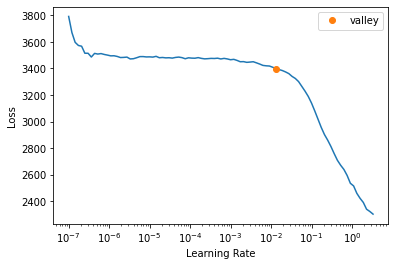

In [27]:
lr_value=learn.lr_find()
lr_value

In [28]:
learn.fit_one_cycle(250,0.045)



epoch,train_loss,valid_loss,_rmse,time
0,3617.657471,5074.267090,71.233887,00:00
1,3571.708740,5073.921875,71.231468,00:00
2,3409.145264,5072.697266,71.222870,00:00
3,3429.596191,5071.303223,71.213081,00:00
4,3422.420166,5069.702148,71.201843,00:00
5,3440.865723,5066.120605,71.176689,00:00
6,3418.069824,5057.818359,71.118340,00:00
7,3429.357666,5044.722656,71.026215,00:00
8,3411.374268,5021.311035,70.861206,00:00
9,3378.201172,4990.788086,70.645508,00:00


In [29]:
learn.show_results()

,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float,SOC_float_pred
0,1.0,1.0,-1.997006,-0.546170,-2.012868,-0.162131,-2.025407,-0.099398,-2.038320,0.050591,-2.058602,0.401018,-2.083273,0.509660,-2.077263,0.542526,-2.071952,0.479817,-2.080499,0.359409,-2.093606,-0.253015,-2.086192,-0.151001,-2.095911,0.158494,-2.101319,0.655074,-2.110017,1.318823,80.0,73.583252
1,1.0,4.0,1.081453,-1.170996,1.081178,-1.112790,1.056870,-1.565907,1.021832,-1.913721,0.982790,-2.257638,0.908509,-2.305752,0.814197,-2.295275,0.665138,-1.888939,0.605045,-1.139936,0.594031,-0.703411,0.595904,-0.542840,0.580305,-0.533562,0.577583,-0.662246,0.566832,-0.940601,10.0,12.314097
2,1.0,4.0,0.751551,-0.632738,0.820585,0.327601,0.847509,-0.038439,0.835886,-0.082369,0.856790,-0.267370,0.871249,-0.313886,0.881633,-0.708292,0.846548,-1.402032,0.766762,-2.052157,0.684983,-2.262267,0.590171,-2.368760,0.546688,-2.706032,0.500634,-2.608371,0.469725,-2.720901,100.0,95.669540
3,1.0,5.0,0.343270,-1.248508,0.315189,-0.843256,0.303969,-0.790397,0.286284,-0.435440,0.278321,-0.185596,0.283511,0.146840,0.304949,0.334668,0.348399,0.297917,0.367799,0.167783,0.374375,0.090352,0.365489,-0.233783,0.355412,-0.115546,0.361820,-0.203017,0.350371,-0.624395,80.0,81.022202
4,1.0,4.0,0.248161,1.014382,0.288047,1.273184,0.313551,1.170384,0.333504,0.920036,0.369207,0.691871,0.389752,0.605944,0.427468,0.502354,0.480893,0.435750,0.486543,0.167778,0.492358,-0.192722,0.472890,-0.236291,0.465522,-0.530836,0.450369,-0.353265,0.453555,-0.811073,40.0,38.145756
5,1.0,3.0,0.769566,-1.676875,0.736515,-1.394646,0.714345,-1.151641,0.708850,-0.977972,0.699642,-0.484073,0.700432,-0.298037,0.725262,-0.411898,0.725123,-0.888255,0.659576,-1.430291,0.589304,-1.831669,0.510191,-2.153322,0.462312,-2.029658,0.431230,-1.785916,0.407529,-1.645452,80.0,74.056610
6,1.0,1.0,-1.823678,-0.322544,-1.841486,-0.050023,-1.845533,-0.029828,-1.855300,0.006056,-1.879084,0.335207,-1.899023,0.426949,-1.904216,0.291664,-1.927062,0.096639,-1.944826,-0.353957,-1.971879,-0.853527,-2.021208,-1.168619,-2.048802,-0.659298,-2.060722,-0.443134,-2.070401,0.566437,90.0,90.551407
7,1.0,1.0,-1.553203,-0.160360,-1.556973,-0.066001,-1.568716,-0.225056,-1.583547,-0.341641,-1.631982,-0.495892,-1.653819,-0.564399,-1.717480,-0.865111,-1.818357,-1.047043,-1.900268,-0.978381,-1.928408,-0.837103,-1.949921,-0.260268,-1.942245,-0.035276,-1.942374,0.509216,-1.947041,1.348502,10.0,18.758547
8,1.0,8.0,0.431599,-0.282894,0.473048,0.509045,0.499479,0.180321,0.494361,0.158219,0.518767,0.087542,0.534334,0.090258,0.550281,-0.087827,0.543780,-0.410180,0.520429,-0.479992,0.502239,-0.360647,0.494865,-0.322742,0.488067,-0.778426,0.476375,-0.777743,0.459305,-1.012951,100.0,96.311310


In [30]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)

4.323171

In [31]:
learn.save('EIS_tabular_regression_rect')

Path('../models/models/EIS_tabular_regression_rect.pth')